# Evaluation pipeline

## 0 Imports and Constants

In [1]:
import sys
import os

# Füge das übergeordnete Verzeichnis zu sys.path hinzu
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.insert(0, parent_dir)

In [2]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import seaborn as sns
from copy import deepcopy as dc

from utilities import split_data_into_sequences, load_sequential_time_series, reconstruct_sequential_data, Scaler, extract_features_and_targets_reg
from visual_evaluation import visualize
from predictive_evaluation import predictive_evaluation

In [3]:
DATA_FOLDER = Path("../data")
REAL_DATA_FOLDER = DATA_FOLDER / "real"
SYNTHETIC_DATA_FOLDER = DATA_FOLDER / "synthetic"
BENCHMARK = False

## 1 Load and Visualize Data

### Ways of loading data
- Laden der Originaldaten: als pd dataframe 
- Laden der synthetischen, sequentiellen Daten: als np array (GAN, (V)AE)
- Laden der synthetischen, sequentiellen Daten: als pd dataframe (brownian, algorithmit)

In [4]:
# possible types: 'brownian_motion', 'timegan_lstm', 'timegan_gru'
syn_data_type = 'timegan_lstm'

In [5]:
# Load real time series
data_real_df = pd.read_csv(REAL_DATA_FOLDER/'metro_interstate_traffic_volume_label_encoded.csv')
data_real_numpy = dc(data_real_df).to_numpy()

if syn_data_type == 'timegan_lstm':
    # load sequential data (which should already be scaled)
    data_syn_numpy = load_sequential_time_series(SYNTHETIC_DATA_FOLDER/'mitv_28499_12_11_lstm_unscaled.csv', shape=(28499, 12, 11))

elif syn_data_type == 'timegan_gru':
    data_syn_numpy = load_sequential_time_series(SYNTHETIC_DATA_FOLDER/'mitv_28499_12_11_gru_unscaled.csv', shape=(28499, 12, 11))

elif syn_data_type == 'brownian_motion':
    data_syn_df = pd.read_csv(SYNTHETIC_DATA_FOLDER/'mitv_brownian_motion.csv')
    data_syn_numpy = dc(data_syn_df).to_numpy()

## 2 Train and Test Baseline Model

### Set Hyperparameters and Features

In [6]:
hyperparameters = {
    "seq_len": 12,
    "lr": 0.0001,
    "batch_size": 32,
    "hidden_size": 4,
    "num_layers": 1,
    "num_evaluation_runs": 10,
    "num_epochs": 500,
    "device": 'cuda' if torch.cuda.is_available() else 'cpu'
}

In [7]:
results = predictive_evaluation(data_real_numpy, data_syn_numpy, hyperparameters, verbose=True)

HYPERPARAMETERS:
seq_len :  12
lr :  0.0001
batch_size :  32
hidden_size :  4
num_layers :  1
num_evaluation_runs :  10
num_epochs :  500
device :  cpu
Synthetic Data is sequential: True
Shape of the data after splitting into sequences: (22797, 12, 11)
Shape of the data after splitting into sequences: (2841, 12, 11)
Shape of the data after splitting into sequences: (2840, 12, 11)


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1
Training Loss: 0.6663662269711494
Training Loss: 0.447222546339035
Training Loss: 0.2696187410503626
Validation Loss: 0.155027836561203
Validation Accuracy: 0.0
**************************************************
Epoch: 2
Training Loss: 0.12928648998960854
Training Loss: 0.093089131526649
Training Loss: 0.07950557228177786
Validation Loss: 0.07126006626346137
Validation Accuracy: 0.0
**************************************************
Epoch: 3
Training Loss: 0.07610764855518937
Training Loss: 0.07304869592189789
Training Loss: 0.07169888580217958
Validation Loss: 0.06693078828661629
Validation Accuracy: 0.0
**************************************************
Epoch: 4
Training Loss: 0.07169118646532296
Training Loss: 0.06865646861493588
Training Loss: 0.06723233325406909
Validation Loss: 0.06278623481479924
Validation Accuracy: 0.0
**************************************************
Epoch: 5
Training Loss: 0.0671293299458921
Training Loss: 0.06386700388044118
Training Loss: 0.06201

/Users/arneallwardt/Documents/-Studium/Bachelorarbeit/time_series_data_augmentation/data_evaluation/predictive_evaluation.py:244: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame([{'Model': evaluation_method, 'Metric': 'MAE', 'Error': mae}])], ignore_index=True)
 10%|█         | 1/10 [08:58<1:20:49, 538.85s/it]

Training Loss: 0.00334530548134353
Validation Loss: 0.001200123904586843
Validation Accuracy: 0.0
**************************************************
Epoch: 1
Training Loss: 0.6528871312737465
Training Loss: 0.4542937351763248
Training Loss: 0.275007753521204
Validation Loss: 0.13909588662091266
Validation Accuracy: 0.0
**************************************************
Epoch: 2
Training Loss: 0.11154037920758128
Training Loss: 0.07662199156358838
Training Loss: 0.06499374102801085
Validation Loss: 0.05626923708098658
Validation Accuracy: 0.0
**************************************************
Epoch: 3
Training Loss: 0.059854899123311045
Training Loss: 0.0555738864466548
Training Loss: 0.05207659238949418
Validation Loss: 0.04500912517058046
Validation Accuracy: 0.0
**************************************************
Epoch: 4
Training Loss: 0.047695940397679805
Training Loss: 0.04348746467381716
Training Loss: 0.039556628055870534
Validation Loss: 0.0335585642396734
Validation Accuracy: 0

 20%|██        | 2/10 [18:01<1:12:06, 540.86s/it]

Training Loss: 0.0032022465276531874
Validation Loss: 0.0011314136329959826
Validation Accuracy: 0.0
**************************************************
Epoch: 1
Training Loss: 0.19937949527055024
Training Loss: 0.15735037487000228
Training Loss: 0.11994294568896294
Validation Loss: 0.09132154750522603
Validation Accuracy: 0.0
**************************************************
Epoch: 2
Training Loss: 0.08112709570676088
Training Loss: 0.06847118580713868
Training Loss: 0.06374208815395832
Validation Loss: 0.060726620131329206
Validation Accuracy: 0.0
**************************************************
Epoch: 3
Training Loss: 0.061492422185838225
Training Loss: 0.057585375662893054
Training Loss: 0.05479547969996929
Validation Loss: 0.05171438314941492
Validation Accuracy: 0.0
**************************************************
Epoch: 4
Training Loss: 0.05326597824692726
Training Loss: 0.04938632242381573
Training Loss: 0.04645699325017631
Validation Loss: 0.042881664139836025
Validation A

 30%|███       | 3/10 [27:03<1:03:10, 541.44s/it]

Training Loss: 0.0031692471317364833
Validation Loss: 0.0011319124939056177
Validation Accuracy: 0.0
**************************************************
Epoch: 1
Training Loss: 0.07958567967638373
Training Loss: 0.07199439791962504
Training Loss: 0.06866174345836043
Validation Loss: 0.06623552321048265
Validation Accuracy: 0.0
**************************************************
Epoch: 2
Training Loss: 0.06792989725247026
Training Loss: 0.06493941919878125
Training Loss: 0.062365878373384476
Validation Loss: 0.059760066523645704
Validation Accuracy: 0.0
**************************************************
Epoch: 3
Training Loss: 0.06123807398602366
Training Loss: 0.05739058165811002
Training Loss: 0.053597641661763194
Validation Loss: 0.04917829194932841
Validation Accuracy: 0.0
**************************************************
Epoch: 4
Training Loss: 0.049827104117721316
Training Loss: 0.04381883654743433
Training Loss: 0.038424567896872756
Validation Loss: 0.031501343327291896
Validation

 40%|████      | 4/10 [36:04<54:09, 541.54s/it]  

Training Loss: 0.003218510904989671
Validation Loss: 0.0012407997473315702
Validation Accuracy: 0.0
**************************************************
Epoch: 1
Training Loss: 0.7352955192327499
Training Loss: 0.6322970375418663
Training Loss: 0.533583398014307
Validation Loss: 0.4143706854809536
Validation Accuracy: 0.0
**************************************************
Epoch: 2
Training Loss: 0.35080209240317345
Training Loss: 0.21059063915163279
Training Loss: 0.1281411422416568
Validation Loss: 0.08446835759985313
Validation Accuracy: 0.0
**************************************************
Epoch: 3
Training Loss: 0.09482443738728762
Training Loss: 0.08709169264882803
Training Loss: 0.08387907404452562
Validation Loss: 0.07525655903508154
Validation Accuracy: 0.0
**************************************************
Epoch: 4
Training Loss: 0.08121734658256173
Training Loss: 0.07665160197764635
Training Loss: 0.07427514860406519
Validation Loss: 0.06793615075477054
Validation Accuracy: 0.

 50%|█████     | 5/10 [45:05<45:05, 541.13s/it]

Training Loss: 0.003555184783763252
Validation Loss: 0.0016029029522153936
Validation Accuracy: 0.0
**************************************************
Epoch: 1
Training Loss: 0.10288385599851609
Training Loss: 0.07663243664428591
Training Loss: 0.0657607538253069
Validation Loss: 0.05693258001898112
Validation Accuracy: 0.0
**************************************************
Epoch: 2
Training Loss: 0.05903530884534121
Training Loss: 0.05334876356646419
Training Loss: 0.04838819617405534
Validation Loss: 0.04098673501794928
Validation Accuracy: 0.0
**************************************************
Epoch: 3
Training Loss: 0.04215560482814908
Training Loss: 0.03670288598630577
Training Loss: 0.03205102829262614
Validation Loss: 0.027076768919072125
Validation Accuracy: 0.0
**************************************************
Epoch: 4
Training Loss: 0.02866703149396926
Training Loss: 0.025432016933336854
Training Loss: 0.022872091108001768
Validation Loss: 0.0205901258970412
Validation Accur

 60%|██████    | 6/10 [54:42<36:53, 553.45s/it]

Validation Loss: 0.0011893090405475264
Validation Accuracy: 0.0
**************************************************
Epoch: 1
Training Loss: 0.07932371674105525
Training Loss: 0.06985533302649856
Training Loss: 0.0662119648978114
Validation Loss: 0.0626149411951558
Validation Accuracy: 0.0
**************************************************
Epoch: 2
Training Loss: 0.06499626986682415
Training Loss: 0.061079278755933046
Training Loss: 0.05791582444682717
Validation Loss: 0.05384120181872604
Validation Accuracy: 0.0
**************************************************
Epoch: 3
Training Loss: 0.05530645583756268
Training Loss: 0.05097677491605282
Training Loss: 0.0467719310708344
Validation Loss: 0.04239381751401371
Validation Accuracy: 0.0
**************************************************
Epoch: 4
Training Loss: 0.043397416286170484
Training Loss: 0.03926441813819111
Training Loss: 0.03486965515650809
Validation Loss: 0.030646093231573534
Validation Accuracy: 0.0
****************************

 70%|███████   | 7/10 [1:03:43<27:27, 549.18s/it]

Training Loss: 0.0031942421794519758
Validation Loss: 0.0012159575420442256
Validation Accuracy: 0.0
**************************************************
Epoch: 1
Training Loss: 0.10786302700638771
Training Loss: 0.0843490538187325
Training Loss: 0.0712946591898799
Validation Loss: 0.0641628240099114
Validation Accuracy: 0.0
**************************************************
Epoch: 2
Training Loss: 0.06602792093530298
Training Loss: 0.062002430725842717
Training Loss: 0.05810570780187845
Validation Loss: 0.05178775106755535
Validation Accuracy: 0.0
**************************************************
Epoch: 3
Training Loss: 0.05396900304593146
Training Loss: 0.04916972881183028
Training Loss: 0.04413375085219741
Validation Loss: 0.03729833829938696
Validation Accuracy: 0.0
**************************************************
Epoch: 4
Training Loss: 0.03984220370650291
Training Loss: 0.03570592870004475
Training Loss: 0.03143306852784008
Validation Loss: 0.026179876576146382
Validation Accura

 80%|████████  | 8/10 [1:12:43<18:12, 546.26s/it]

Training Loss: 0.003256891326454934
Validation Loss: 0.0011592410037848638
Validation Accuracy: 0.0
**************************************************
Epoch: 1
Training Loss: 0.6728356258571148
Training Loss: 0.5071502548456192
Training Loss: 0.3761700618267059
Validation Loss: 0.26355358807558427
Validation Accuracy: 0.0
**************************************************
Epoch: 2
Training Loss: 0.23314509365707636
Training Loss: 0.15643349446356297
Training Loss: 0.09820652406662703
Validation Loss: 0.058654001568642894
Validation Accuracy: 0.0
**************************************************
Epoch: 3
Training Loss: 0.06471057686023414
Training Loss: 0.057894005198031666
Training Loss: 0.055614727232605216
Validation Loss: 0.050397759010450224
Validation Accuracy: 0.0
**************************************************
Epoch: 4
Training Loss: 0.05389415545389056
Training Loss: 0.05007730895653367
Training Loss: 0.04789281534962356
Validation Loss: 0.04360804321725717
Validation Accur

 90%|█████████ | 9/10 [1:21:42<09:04, 544.13s/it]

Training Loss: 0.0033543446415569634
Validation Loss: 0.0014180125167666611
Validation Accuracy: 0.0
**************************************************
Epoch: 1
Training Loss: 0.6110214653611183
Training Loss: 0.3924754986912012
Training Loss: 0.21035401977598667
Validation Loss: 0.09636150087031085
Validation Accuracy: 0.0
**************************************************
Epoch: 2
Training Loss: 0.08942875750362873
Training Loss: 0.07135081740096211
Training Loss: 0.06666100800037383
Validation Loss: 0.05830836120281327
Validation Accuracy: 0.0
**************************************************
Epoch: 3
Training Loss: 0.0657526700757444
Training Loss: 0.0627904736250639
Training Loss: 0.061605473998934034
Validation Loss: 0.05493209067355381
Validation Accuracy: 0.0
**************************************************
Epoch: 4
Training Loss: 0.06138216231018305
Training Loss: 0.05860080759972334
Training Loss: 0.05734769789502025
Validation Loss: 0.05143170740999532
Validation Accuracy

100%|██████████| 10/10 [1:30:42<00:00, 544.21s/it]

Training Loss: 0.0033306666763382965
Validation Loss: 0.0012480338552726036
Validation Accuracy: 0.0
**************************************************


Shape of the data after splitting into sequences: (22797, 12, 11)
Shape of the data after splitting into sequences: (5692, 12, 11)


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1
Training Loss: 0.23436662204563619
Training Loss: 0.16783254899084568
Training Loss: 0.12463886372745037
Validation Loss: 0.09836557733543803
Validation Accuracy: 0.0
**************************************************
Epoch: 2
Training Loss: 0.08906922267749906
Training Loss: 0.08046709503978491
Training Loss: 0.07434427831321955
Validation Loss: 0.07308931127609161
Validation Accuracy: 0.0
**************************************************
Epoch: 3
Training Loss: 0.06926385700702667
Training Loss: 0.06509874382987618
Training Loss: 0.059115110766142606
Validation Loss: 0.057359268899295435
Validation Accuracy: 0.0
**************************************************
Epoch: 4
Training Loss: 0.05356232617050409
Training Loss: 0.049926393227651716
Training Loss: 0.04424985289573669
Validation Loss: 0.043006539648252254
Validation Accuracy: 0.0
**************************************************
Epoch: 5
Training Loss: 0.04035400059074164
Training Loss: 0.037933015143498776
Training

 10%|█         | 1/10 [09:13<1:23:03, 553.67s/it]

Validation Loss: 0.0015620340810947413
Validation Accuracy: 0.0
**************************************************
Epoch: 1
Training Loss: 0.44399105221033097
Training Loss: 0.3633736482262611
Training Loss: 0.27657382063567637
Validation Loss: 0.19840169078513478
Validation Accuracy: 0.0
**************************************************
Epoch: 2
Training Loss: 0.15827912744134665
Training Loss: 0.11161156117916107
Training Loss: 0.07846144676208495
Validation Loss: 0.06300302932896976
Validation Accuracy: 0.0
**************************************************
Epoch: 3
Training Loss: 0.060458184629678724
Training Loss: 0.058023922480642795
Training Loss: 0.055165666034445164
Validation Loss: 0.052116144427590154
Validation Accuracy: 0.0
**************************************************
Epoch: 4
Training Loss: 0.05326666355133056
Training Loss: 0.051690425034612415
Training Loss: 0.049082037089392544
Validation Loss: 0.046126105843551375
Validation Accuracy: 0.0
**********************

 20%|██        | 2/10 [18:27<1:13:52, 554.03s/it]

Validation Loss: 0.0014214433315654776
Validation Accuracy: 0.0
**************************************************
Epoch: 1
Training Loss: 0.5716096480190754
Training Loss: 0.4399921080470085
Training Loss: 0.2905855671316385
Validation Loss: 0.16086810479840535
Validation Accuracy: 0.0
**************************************************
Epoch: 2
Training Loss: 0.1235992238484323
Training Loss: 0.0882346866838634
Training Loss: 0.0738570062816143
Validation Loss: 0.07097546063530981
Validation Accuracy: 0.0
**************************************************
Epoch: 3
Training Loss: 0.06899189116433263
Training Loss: 0.06703155755996704
Training Loss: 0.06476742450147867
Validation Loss: 0.06518529548069064
Validation Accuracy: 0.0
**************************************************
Epoch: 4
Training Loss: 0.06403228836134076
Training Loss: 0.06258939933031797
Training Loss: 0.06047057140618563
Validation Loss: 0.060827068210150416
Validation Accuracy: 0.0
*********************************

 30%|███       | 3/10 [27:40<1:04:31, 553.13s/it]

Validation Loss: 0.0017200823620830276
Validation Accuracy: 0.0
**************************************************
Epoch: 1
Training Loss: 0.1176500876992941
Training Loss: 0.09871126476675272
Training Loss: 0.08886128650978208
Validation Loss: 0.08428773593701673
Validation Accuracy: 0.0
**************************************************
Epoch: 2
Training Loss: 0.08061256978660822
Training Loss: 0.07707520596683025
Training Loss: 0.07516716213896871
Validation Loss: 0.07371435458824206
Validation Accuracy: 0.0
**************************************************
Epoch: 3
Training Loss: 0.07218088885769249
Training Loss: 0.0692146259173751
Training Loss: 0.06677077231928706
Validation Loss: 0.06431845437442318
Validation Accuracy: 0.0
**************************************************
Epoch: 4
Training Loss: 0.06298852814361453
Training Loss: 0.05933583884499967
Training Loss: 0.05536426785402
Validation Loss: 0.05201923082258259
Validation Accuracy: 0.0
*********************************

 40%|████      | 4/10 [36:53<55:19, 553.21s/it]  

Validation Loss: 0.0014640916213445533
Validation Accuracy: 0.0
**************************************************
Epoch: 1
Training Loss: 0.7702496808767318
Training Loss: 0.6123745130002498
Training Loss: 0.43926837891340254
Validation Loss: 0.2350143546636185
Validation Accuracy: 0.0
**************************************************
Epoch: 2
Training Loss: 0.15272768050432206
Training Loss: 0.07640252800658345
Training Loss: 0.06460671532899141
Validation Loss: 0.0626037988100159
Validation Accuracy: 0.0
**************************************************
Epoch: 3
Training Loss: 0.06139244150370359
Training Loss: 0.06007810901850462
Training Loss: 0.05688535360619426
Validation Loss: 0.0555121535330676
Validation Accuracy: 0.0
**************************************************
Epoch: 4
Training Loss: 0.054361259806901215
Training Loss: 0.05306393422186375
Training Loss: 0.049924986455589536
Validation Loss: 0.048490329185144954
Validation Accuracy: 0.0
******************************

 50%|█████     | 5/10 [46:06<46:06, 553.34s/it]

Validation Loss: 0.0015806211776680868
Validation Accuracy: 0.0
**************************************************
Epoch: 1
Training Loss: 0.3880057099461556
Training Loss: 0.23683721479028463
Training Loss: 0.13484564071521163
Validation Loss: 0.0880849508129144
Validation Accuracy: 0.0
**************************************************
Epoch: 2
Training Loss: 0.08046374633908272
Training Loss: 0.07239193743094802
Training Loss: 0.06774965470656752
Validation Loss: 0.06420191412979967
Validation Accuracy: 0.0
**************************************************
Epoch: 3
Training Loss: 0.06336562540382147
Training Loss: 0.0607470141351223
Training Loss: 0.05850304871797562
Validation Loss: 0.05665485364165199
Validation Accuracy: 0.0
**************************************************
Epoch: 4
Training Loss: 0.0562164756283164
Training Loss: 0.054193429565057155
Training Loss: 0.05205838914960623
Validation Loss: 0.05055560650869032
Validation Accuracy: 0.0
*******************************

 60%|██████    | 6/10 [55:21<36:54, 553.74s/it]

Validation Loss: 0.0016880491333150336
Validation Accuracy: 0.0
**************************************************
Epoch: 1
Training Loss: 0.5524113231897354
Training Loss: 0.2805024049431086
Training Loss: 0.11488271499052644
Validation Loss: 0.07792490911199136
Validation Accuracy: 0.0
**************************************************
Epoch: 2
Training Loss: 0.07328037485480308
Training Loss: 0.06938138501718641
Training Loss: 0.06492814479395748
Validation Loss: 0.0641797183688437
Validation Accuracy: 0.0
**************************************************
Epoch: 3
Training Loss: 0.06167802780866623
Training Loss: 0.05873171538114548
Training Loss: 0.054389196187257766
Validation Loss: 0.05303794999470871
Validation Accuracy: 0.0
**************************************************
Epoch: 4
Training Loss: 0.05077037518844008
Training Loss: 0.04757838251069188
Training Loss: 0.042999395048245785
Validation Loss: 0.04058485834995348
Validation Accuracy: 0.0
*****************************

 70%|███████   | 7/10 [1:04:35<27:41, 553.76s/it]

Validation Loss: 0.0018751196706473952
Validation Accuracy: 0.0
**************************************************
Epoch: 1
Training Loss: 0.07818777211010457
Training Loss: 0.07000060150399805
Training Loss: 0.06502135934308172
Validation Loss: 0.062404412880874754
Validation Accuracy: 0.0
**************************************************
Epoch: 2
Training Loss: 0.06101897396147251
Training Loss: 0.0570283155143261
Training Loss: 0.05136418667621911
Validation Loss: 0.04653049795103542
Validation Accuracy: 0.0
**************************************************
Epoch: 3
Training Loss: 0.044567096326500175
Training Loss: 0.039032391170039774
Training Loss: 0.03219601007644087
Validation Loss: 0.027319705657912103
Validation Accuracy: 0.0
**************************************************
Epoch: 4
Training Loss: 0.02496141066774726
Training Loss: 0.022522063250653444
Training Loss: 0.019847133266739547
Validation Loss: 0.01852070362296667
Validation Accuracy: 0.0
***********************

 80%|████████  | 8/10 [1:13:48<18:27, 553.73s/it]

Validation Loss: 0.0013685833742538614
Validation Accuracy: 0.0
**************************************************
Epoch: 1
Training Loss: 0.0671643153950572
Training Loss: 0.0604986451100558
Training Loss: 0.0566718584485352
Validation Loss: 0.054118651436286025
Validation Accuracy: 0.0
**************************************************
Epoch: 2
Training Loss: 0.05301584467291832
Training Loss: 0.0501723715569824
Training Loss: 0.04605948054231703
Validation Loss: 0.0440403904577487
Validation Accuracy: 0.0
**************************************************
Epoch: 3
Training Loss: 0.042899772794917225
Training Loss: 0.04089825659990311
Training Loss: 0.0373093881458044
Validation Loss: 0.03598009879711304
Validation Accuracy: 0.0
**************************************************
Epoch: 4
Training Loss: 0.03483923595398664
Training Loss: 0.033477990245446565
Training Loss: 0.03053617022931576
Validation Loss: 0.029557704130250415
Validation Accuracy: 0.0
******************************

 90%|█████████ | 9/10 [1:23:01<09:13, 553.27s/it]

Validation Loss: 0.0014907033494974517
Validation Accuracy: 0.0
**************************************************
Epoch: 1
Training Loss: 0.08593816474080086
Training Loss: 0.07853984009474516
Training Loss: 0.07303478615358472
Validation Loss: 0.07046393591785029
Validation Accuracy: 0.0
**************************************************
Epoch: 2
Training Loss: 0.06756908969953657
Training Loss: 0.06454818641766906
Training Loss: 0.06076490519568324
Validation Loss: 0.05916656474216601
Validation Accuracy: 0.0
**************************************************
Epoch: 3
Training Loss: 0.05780267369002104
Training Loss: 0.056115158349275586
Training Loss: 0.05331203389912844
Validation Loss: 0.05218315605869454
Validation Accuracy: 0.0
**************************************************
Epoch: 4
Training Loss: 0.05137104842811823
Training Loss: 0.050158535754308106
Training Loss: 0.04762488291598856
Validation Loss: 0.046483845512769864
Validation Accuracy: 0.0
*************************

100%|██████████| 10/10 [1:32:14<00:00, 553.45s/it]


Validation Loss: 0.0014341051374389424
Validation Accuracy: 0.0
**************************************************
Shape of the data after splitting into sequences: (28500, 12, 11)


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1
Training Loss: 0.37559384778141974
Training Loss: 0.32569333039224146
Training Loss: 0.26099432438611986
Validation Loss: 0.18810140924247284
Validation Accuracy: 0.0
**************************************************
Epoch: 2
Training Loss: 0.15484720163047314
Training Loss: 0.11245529845356941
Training Loss: 0.09152621762827039
Validation Loss: 0.0847821304751508
Validation Accuracy: 0.0
**************************************************
Epoch: 3
Training Loss: 0.08260580649599433
Training Loss: 0.08175857067108154
Training Loss: 0.07622833611443638
Validation Loss: 0.07111249905724765
Validation Accuracy: 0.0
**************************************************
Epoch: 4
Training Loss: 0.06881368584930897
Training Loss: 0.06643470404669642
Training Loss: 0.060609923657029864
Validation Loss: 0.055029009380403844
Validation Accuracy: 0.0
**************************************************
Epoch: 5
Training Loss: 0.05345975621603429
Training Loss: 0.05185257531702518
Training Los

 10%|█         | 1/10 [09:12<1:22:55, 552.86s/it]

Validation Loss: 0.004277063718855162
Validation Accuracy: 0.0
**************************************************
Epoch: 1
Training Loss: 0.30545214980840685
Training Loss: 0.2203982388973236
Training Loss: 0.14915098134428262
Validation Loss: 0.10261016176732558
Validation Accuracy: 0.0
**************************************************
Epoch: 2
Training Loss: 0.08920738305896521
Training Loss: 0.07811713170260191
Training Loss: 0.07015470007434488
Validation Loss: 0.06601864257671314
Validation Accuracy: 0.0
**************************************************
Epoch: 3
Training Loss: 0.06382519979029894
Training Loss: 0.06218464599922299
Training Loss: 0.05608587583526969
Validation Loss: 0.04960157892890483
Validation Accuracy: 0.0
**************************************************
Epoch: 4
Training Loss: 0.04675926961004734
Training Loss: 0.0437686653342098
Training Loss: 0.04048094341531396
Validation Loss: 0.03625940950847538
Validation Accuracy: 0.0
*******************************

 20%|██        | 2/10 [18:25<1:13:42, 552.84s/it]

Validation Loss: 0.0042765851118914035
Validation Accuracy: 0.0
**************************************************
Epoch: 1
Training Loss: 0.10164416193962098
Training Loss: 0.09708470964804292
Training Loss: 0.08782112183049322
Validation Loss: 0.07992035038144894
Validation Accuracy: 0.0
**************************************************
Epoch: 2
Training Loss: 0.07457320144400001
Training Loss: 0.06839047968387604
Training Loss: 0.05731333689764142
Validation Loss: 0.04912168971736338
Validation Accuracy: 0.0
**************************************************
Epoch: 3
Training Loss: 0.04612889938056469
Training Loss: 0.04414431218057871
Training Loss: 0.0384559222497046
Validation Loss: 0.03389111944791658
Validation Accuracy: 0.0
**************************************************
Epoch: 4
Training Loss: 0.03256271487567574
Training Loss: 0.03212590921903029
Training Loss: 0.029414109620265663
Validation Loss: 0.026491517232283535
Validation Accuracy: 0.0
***************************

 30%|███       | 3/10 [27:39<1:04:32, 553.20s/it]

Validation Loss: 0.004625370583884605
Validation Accuracy: 0.0
**************************************************
Epoch: 1
Training Loss: 0.27112808264791965
Training Loss: 0.17909461710602045
Training Loss: 0.11655953798443079
Validation Loss: 0.08861174332446226
Validation Accuracy: 0.0
**************************************************
Epoch: 2
Training Loss: 0.08131449988111854
Training Loss: 0.07457541350275278
Training Loss: 0.06458135860040784
Validation Loss: 0.05635636999120926
Validation Accuracy: 0.0
**************************************************
Epoch: 3
Training Loss: 0.05289432317018509
Training Loss: 0.04985677911899984
Training Loss: 0.04545115777291357
Validation Loss: 0.042502329336198345
Validation Accuracy: 0.0
**************************************************
Epoch: 4
Training Loss: 0.041502063665539025
Training Loss: 0.04188506178092211
Training Loss: 0.04006196734495461
Validation Loss: 0.03762238718277915
Validation Accuracy: 0.0
***************************

 40%|████      | 4/10 [36:52<55:19, 553.30s/it]  

Validation Loss: 0.004592375047101676
Validation Accuracy: 0.0
**************************************************
Epoch: 1
Training Loss: 1.1045613214373589
Training Loss: 0.947422641813755
Training Loss: 0.8035422736406326
Validation Loss: 0.6296814335458105
Validation Accuracy: 0.0
**************************************************
Epoch: 2
Training Loss: 0.5167202524840832
Training Loss: 0.2768557746708393
Training Loss: 0.1150219477713108
Validation Loss: 0.07396549125873177
Validation Accuracy: 0.0
**************************************************
Epoch: 3
Training Loss: 0.06699247926473617
Training Loss: 0.059207472782582045
Training Loss: 0.04873989623039961
Validation Loss: 0.04101488455172691
Validation Accuracy: 0.0
**************************************************
Epoch: 4
Training Loss: 0.03849008548073471
Training Loss: 0.03723553966730833
Training Loss: 0.03497638313099742
Validation Loss: 0.03232758414187578
Validation Accuracy: 0.0
************************************

 50%|█████     | 5/10 [46:06<46:07, 553.46s/it]

Validation Loss: 0.0042220176907786944
Validation Accuracy: 0.0
**************************************************
Epoch: 1
Training Loss: 0.1148595853894949
Training Loss: 0.09880872290581465
Training Loss: 0.08587865291163325
Validation Loss: 0.07710730840124232
Validation Accuracy: 0.0
**************************************************
Epoch: 2
Training Loss: 0.07158173566684127
Training Loss: 0.06346969602629543
Training Loss: 0.05017305246554315
Validation Loss: 0.04025375470519066
Validation Accuracy: 0.0
**************************************************
Epoch: 3
Training Loss: 0.03751939338631928
Training Loss: 0.03503571384586394
Training Loss: 0.031062426688149573
Validation Loss: 0.027916764871701184
Validation Accuracy: 0.0
**************************************************
Epoch: 4
Training Loss: 0.02697366076055914
Training Loss: 0.02694142851047218
Training Loss: 0.02551506204297766
Validation Loss: 0.02339896710079642
Validation Accuracy: 0.0
***************************

 60%|██████    | 6/10 [55:21<36:55, 553.98s/it]

Validation Loss: 0.004242319942779797
Validation Accuracy: 0.0
**************************************************
Epoch: 1
Training Loss: 0.1065560208261013
Training Loss: 0.08083351127803326
Training Loss: 0.06020583832636475
Validation Loss: 0.049180875579155355
Validation Accuracy: 0.0
**************************************************
Epoch: 2
Training Loss: 0.04654856863431633
Training Loss: 0.04474319500848651
Training Loss: 0.04106922981329262
Validation Loss: 0.03781016026337387
Validation Accuracy: 0.0
**************************************************
Epoch: 3
Training Loss: 0.036475789276883004
Training Loss: 0.03557816696353257
Training Loss: 0.033094403673894705
Validation Loss: 0.0307782098089017
Validation Accuracy: 0.0
**************************************************
Epoch: 4
Training Loss: 0.029953186265192926
Training Loss: 0.029808188211172818
Training Loss: 0.028346368037164213
Validation Loss: 0.02655918966437685
Validation Accuracy: 0.0
*************************

 70%|███████   | 7/10 [1:04:35<27:41, 553.94s/it]

Validation Loss: 0.004546073131398532
Validation Accuracy: 0.0
**************************************************
Epoch: 1
Training Loss: 0.1952833644300699
Training Loss: 0.13650454126298428
Training Loss: 0.09732658283784985
Validation Loss: 0.07724046407465163
Validation Accuracy: 0.0
**************************************************
Epoch: 2
Training Loss: 0.07126435508951545
Training Loss: 0.065508131403476
Training Loss: 0.058526583947241306
Validation Loss: 0.05205887754827571
Validation Accuracy: 0.0
**************************************************
Epoch: 3
Training Loss: 0.04967083028517663
Training Loss: 0.047815591040998695
Training Loss: 0.0445253977086395
Validation Loss: 0.039997872048416615
Validation Accuracy: 0.0
**************************************************
Epoch: 4
Training Loss: 0.039062056015245615
Training Loss: 0.039148108884692195
Training Loss: 0.03743839548900724
Validation Loss: 0.033590243785907435
Validation Accuracy: 0.0
***************************

 80%|████████  | 8/10 [1:13:48<18:27, 553.66s/it]

Validation Loss: 0.004463979575715376
Validation Accuracy: 0.0
**************************************************
Epoch: 1
Training Loss: 0.08860180631279946
Training Loss: 0.08689477317035198
Training Loss: 0.07997572502121329
Validation Loss: 0.07180002177727289
Validation Accuracy: 0.0
**************************************************
Epoch: 2
Training Loss: 0.06746961386874319
Training Loss: 0.06298819959163665
Training Loss: 0.05679944626055658
Validation Loss: 0.050885613945276374
Validation Accuracy: 0.0
**************************************************
Epoch: 3
Training Loss: 0.04892141965217888
Training Loss: 0.04685787965543568
Training Loss: 0.04226758958771825
Validation Loss: 0.03731931898971843
Validation Accuracy: 0.0
**************************************************
Epoch: 4
Training Loss: 0.035660504936240615
Training Loss: 0.034673104058019814
Training Loss: 0.03176479186397046
Validation Loss: 0.02871044950205937
Validation Accuracy: 0.0
**************************

 90%|█████████ | 9/10 [1:23:01<09:13, 553.47s/it]

Validation Loss: 0.004254848339891467
Validation Accuracy: 0.0
**************************************************
Epoch: 1
Training Loss: 0.127355365678668
Training Loss: 0.0981242903880775
Training Loss: 0.08355678744614124
Validation Loss: 0.07256559707099498
Validation Accuracy: 0.0
**************************************************
Epoch: 2
Training Loss: 0.06742022033780813
Training Loss: 0.0587241055816412
Training Loss: 0.049259224329143765
Validation Loss: 0.04049707121897343
Validation Accuracy: 0.0
**************************************************
Epoch: 3
Training Loss: 0.03817962739616632
Training Loss: 0.03717137827537954
Training Loss: 0.03495794596616179
Validation Loss: 0.031574834861360784
Validation Accuracy: 0.0
**************************************************
Epoch: 4
Training Loss: 0.030909584034234286
Training Loss: 0.031507399515248835
Training Loss: 0.030384631576016546
Validation Loss: 0.027653632373366942
Validation Accuracy: 0.0
***************************

100%|██████████| 10/10 [1:32:15<00:00, 553.52s/it]


Validation Loss: 0.004456715843335897
Validation Accuracy: 0.0
**************************************************
Shape of the data after splitting into sequences: (22797, 12, 11)
Shape of the data after splitting into sequences: (2841, 12, 11)
Shape of the data after splitting into sequences: (2840, 12, 11)


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1
Training Loss: 0.31469597078859807
Training Loss: 0.20208992179483176
Training Loss: 0.14397201720625163
Training Loss: 0.10435018045827746
Training Loss: 0.08660482011735439
Training Loss: 0.07813127925619483
Training Loss: 0.06871134780347347
Validation Loss: 0.06557397750879494
Validation Accuracy: 0.0
**************************************************
Epoch: 2
Training Loss: 0.07436348961666227
Training Loss: 0.07149602195248007
Training Loss: 0.068884915728122
Training Loss: 0.06260295612737536
Training Loss: 0.05524053001776338
Training Loss: 0.05186684331856668
Training Loss: 0.04661511905491352
Validation Loss: 0.04854428197504876
Validation Accuracy: 0.0
**************************************************
Epoch: 3
Training Loss: 0.06317692851647734
Training Loss: 0.06095049362629652
Training Loss: 0.05859621211886406
Training Loss: 0.05124878373928368
Training Loss: 0.04260451070033014
Training Loss: 0.04126641388982535
Training Loss: 0.03849406848661602
Validation Los

 10%|█         | 1/10 [18:10<2:43:37, 1090.79s/it]

Training Loss: 0.0065928510227240625
Validation Loss: 0.004995077023498909
Validation Accuracy: 0.0
**************************************************
Epoch: 1
Training Loss: 0.47223583146929743
Training Loss: 0.3165757440030575
Training Loss: 0.19253146577626468
Training Loss: 0.10711010958999395
Training Loss: 0.06549545671790838
Training Loss: 0.05292549485340715
Training Loss: 0.04572092138230801
Validation Loss: 0.044680507330412275
Validation Accuracy: 0.0
**************************************************
Epoch: 2
Training Loss: 0.047473371345549825
Training Loss: 0.047433134214952585
Training Loss: 0.04690527578815818
Training Loss: 0.044274604646489024
Training Loss: 0.039737959811463955
Training Loss: 0.0392732397839427
Training Loss: 0.03634894766379148
Validation Loss: 0.037125486678231075
Validation Accuracy: 0.0
**************************************************
Epoch: 3
Training Loss: 0.042853096295148135
Training Loss: 0.04198140752501786
Training Loss: 0.04060847678687

 20%|██        | 2/10 [36:25<2:25:42, 1092.81s/it]

Training Loss: 0.006401220216794172
Validation Loss: 0.0053719339879405815
Validation Accuracy: 0.0
**************************************************
Epoch: 1
Training Loss: 0.07256385451182723
Training Loss: 0.06970409501343966
Training Loss: 0.06674366608262063
Training Loss: 0.06562162514775992
Training Loss: 0.061121290605515244
Training Loss: 0.053572165127843616
Training Loss: 0.04384466130286455
Validation Loss: 0.042636513996046135
Validation Accuracy: 0.0
**************************************************
Epoch: 2
Training Loss: 0.05262319926172495
Training Loss: 0.04891812825575471
Training Loss: 0.045911812679842116
Training Loss: 0.038055711174383756
Training Loss: 0.027106657889671624
Training Loss: 0.024667076356709002
Training Loss: 0.022331483976449816
Validation Loss: 0.02574015303588148
Validation Accuracy: 0.0
**************************************************
Epoch: 3
Training Loss: 0.038413499295711515
Training Loss: 0.03367868207395077
Training Loss: 0.0308465986

 30%|███       | 3/10 [55:17<2:09:35, 1110.73s/it]

Training Loss: 0.005821709821757395
Validation Loss: 0.0049785094686447245
Validation Accuracy: 0.0
**************************************************
Epoch: 1
Training Loss: 0.07714882439002395
Training Loss: 0.07172163669019938
Training Loss: 0.0687134108506143
Training Loss: 0.0650232870876789
Training Loss: 0.057696744240820406
Training Loss: 0.05220953430980444
Training Loss: 0.045998714482411746
Validation Loss: 0.04574783880277519
Validation Accuracy: 0.0
**************************************************
Epoch: 2
Training Loss: 0.05341645998880267
Training Loss: 0.05014688802883029
Training Loss: 0.04760683773085475
Training Loss: 0.041043121898546815
Training Loss: 0.033405863158404825
Training Loss: 0.031473285835236314
Training Loss: 0.02749592789914459
Validation Loss: 0.028717128090797628
Validation Accuracy: 0.0
**************************************************
Epoch: 3
Training Loss: 0.03647312385961413
Training Loss: 0.03127391868736595
Training Loss: 0.028248694031499

 40%|████      | 4/10 [1:13:39<1:50:45, 1107.55s/it]

Training Loss: 0.00659296086669201
Validation Loss: 0.0053952323699680465
Validation Accuracy: 0.0
**************************************************
Epoch: 1
Training Loss: 0.07897647401317955
Training Loss: 0.07571843102574348
Training Loss: 0.07274292634800077
Training Loss: 0.07089279921725393
Training Loss: 0.06145265186205506
Training Loss: 0.05422140717506409
Training Loss: 0.04879161085933447
Validation Loss: 0.0539688989101501
Validation Accuracy: 0.0
**************************************************
Epoch: 2
Training Loss: 0.06475976333022118
Training Loss: 0.05701964935287833
Training Loss: 0.05055151779204607
Training Loss: 0.04411052970215678
Training Loss: 0.03605553514324129
Training Loss: 0.033044416210614144
Training Loss: 0.030015702617820352
Validation Loss: 0.03280412093544386
Validation Accuracy: 0.0
**************************************************
Epoch: 3
Training Loss: 0.0387063002679497
Training Loss: 0.031293211127631365
Training Loss: 0.028086121138185264


 50%|█████     | 5/10 [1:32:03<1:32:10, 1106.14s/it]

Training Loss: 0.006113325163314584
Validation Loss: 0.0051075670713809935
Validation Accuracy: 0.0
**************************************************
Epoch: 1
Training Loss: 0.8699255177378654
Training Loss: 0.6871340650320054
Training Loss: 0.5108563566207885
Training Loss: 0.31314140766859055
Training Loss: 0.1668617895618081
Training Loss: 0.10499059207737446
Training Loss: 0.07785603938624262
Validation Loss: 0.07015059656753075
Validation Accuracy: 0.0
**************************************************
Epoch: 2
Training Loss: 0.06909075416624547
Training Loss: 0.06410610932856799
Training Loss: 0.061878464035689834
Training Loss: 0.05707203537225723
Training Loss: 0.047313278065994384
Training Loss: 0.039325084760785105
Training Loss: 0.03277998820878565
Validation Loss: 0.036527899069509255
Validation Accuracy: 0.0
**************************************************
Epoch: 3
Training Loss: 0.04857118321582675
Training Loss: 0.04522078001871705
Training Loss: 0.042061504162848
Tra

 60%|██████    | 6/10 [1:50:25<1:13:39, 1104.89s/it]

Training Loss: 0.006772631170751993
Validation Loss: 0.005131586554655561
Validation Accuracy: 0.0
**************************************************
Epoch: 1
Training Loss: 0.07877792673185467
Training Loss: 0.07306420153006911
Training Loss: 0.07042452916502953
Training Loss: 0.07137725213542581
Training Loss: 0.07103713536635041
Training Loss: 0.06085767125710845
Training Loss: 0.04811659129336476
Validation Loss: 0.0485869027283531
Validation Accuracy: 0.0
**************************************************
Epoch: 2
Training Loss: 0.06043712364509702
Training Loss: 0.0560474705696106
Training Loss: 0.052603605799376965
Training Loss: 0.043688902631402016
Training Loss: 0.03129113036207855
Training Loss: 0.029176165726967157
Training Loss: 0.025857446112204342
Validation Loss: 0.031489191282094084
Validation Accuracy: 0.0
**************************************************
Epoch: 3
Training Loss: 0.0439109055697918
Training Loss: 0.03908340880647301
Training Loss: 0.035395087506622076

 70%|███████   | 7/10 [2:08:47<55:11, 1103.69s/it]  

Training Loss: 0.006413374831900001
Validation Loss: 0.004871413121932999
Validation Accuracy: 0.0
**************************************************
Epoch: 1
Training Loss: 0.7623223584890365
Training Loss: 0.5572889333963394
Training Loss: 0.4016087207198143
Training Loss: 0.2439131388813257
Training Loss: 0.13091230157762765
Training Loss: 0.09356419602409005
Training Loss: 0.07930783731862903
Validation Loss: 0.07338929573973912
Validation Accuracy: 0.0
**************************************************
Epoch: 2
Training Loss: 0.07130416790023446
Training Loss: 0.06857761133462191
Training Loss: 0.06606947110965848
Training Loss: 0.062135316226631404
Training Loss: 0.05682446476072073
Training Loss: 0.05324114428833127
Training Loss: 0.047065173778682946
Validation Loss: 0.045178455394807825
Validation Accuracy: 0.0
**************************************************
Epoch: 3
Training Loss: 0.05251751834526658
Training Loss: 0.049636846305802465
Training Loss: 0.04732114844955504
Tr

 80%|████████  | 8/10 [2:27:08<36:46, 1103.09s/it]

Training Loss: 0.006149510792165529
Validation Loss: 0.005137051471809016
Validation Accuracy: 0.0
**************************************************
Epoch: 1
Training Loss: 0.08240952141582966
Training Loss: 0.07493357500061393
Training Loss: 0.06910147231072188
Training Loss: 0.07015195420011879
Training Loss: 0.07079364389181136
Training Loss: 0.06438639102503657
Training Loss: 0.054726489689201116
Validation Loss: 0.05046761306595713
Validation Accuracy: 0.0
**************************************************
Epoch: 2
Training Loss: 0.05210862148553133
Training Loss: 0.04917894508689642
Training Loss: 0.04622290751896799
Training Loss: 0.04390450570732355
Training Loss: 0.03859830510802567
Training Loss: 0.03588925203308463
Training Loss: 0.0321070281136781
Validation Loss: 0.03475185763788469
Validation Accuracy: 0.0
**************************************************
Epoch: 3
Training Loss: 0.04191788445226848
Training Loss: 0.03766357976011932
Training Loss: 0.035353007977828386
T

 90%|█████████ | 9/10 [2:45:29<18:22, 1102.21s/it]

Training Loss: 0.006120483019622043
Validation Loss: 0.005203320965374042
Validation Accuracy: 0.0
**************************************************
Epoch: 1
Training Loss: 0.27819616220891474
Training Loss: 0.20613585826009512
Training Loss: 0.15960889734327793
Training Loss: 0.12161476336419583
Training Loss: 0.10289979454129934
Training Loss: 0.0911028971336782
Training Loss: 0.07873938219621777
Validation Loss: 0.07401928484216612
Validation Accuracy: 0.0
**************************************************
Epoch: 2
Training Loss: 0.07816541604697705
Training Loss: 0.0761335001885891
Training Loss: 0.07397232431918382
Training Loss: 0.0678094238974154
Training Loss: 0.059493763595819475
Training Loss: 0.05558478208258748
Training Loss: 0.04981358787044883
Validation Loss: 0.05225431066606375
Validation Accuracy: 0.0
**************************************************
Epoch: 3
Training Loss: 0.06722812805324793
Training Loss: 0.06503653954714536
Training Loss: 0.06288249241188168
Trai

100%|██████████| 10/10 [3:03:51<00:00, 1103.19s/it]

Training Loss: 0.006427916049142368
Validation Loss: 0.005119473412667823
Validation Accuracy: 0.0
**************************************************


In [14]:
results.shape

(80, 3)

In [17]:
results.to_csv(DATA_FOLDER / f"results/results_{syn_data_type}_{hyperparameters['num_epochs']}_{hyperparameters['num_evaluation_runs']}.csv", index=False)

In [15]:
mse_results = results.loc[results['Metric'] == 'MSE']
mae_results = results.loc[results['Metric'] == 'MAE']

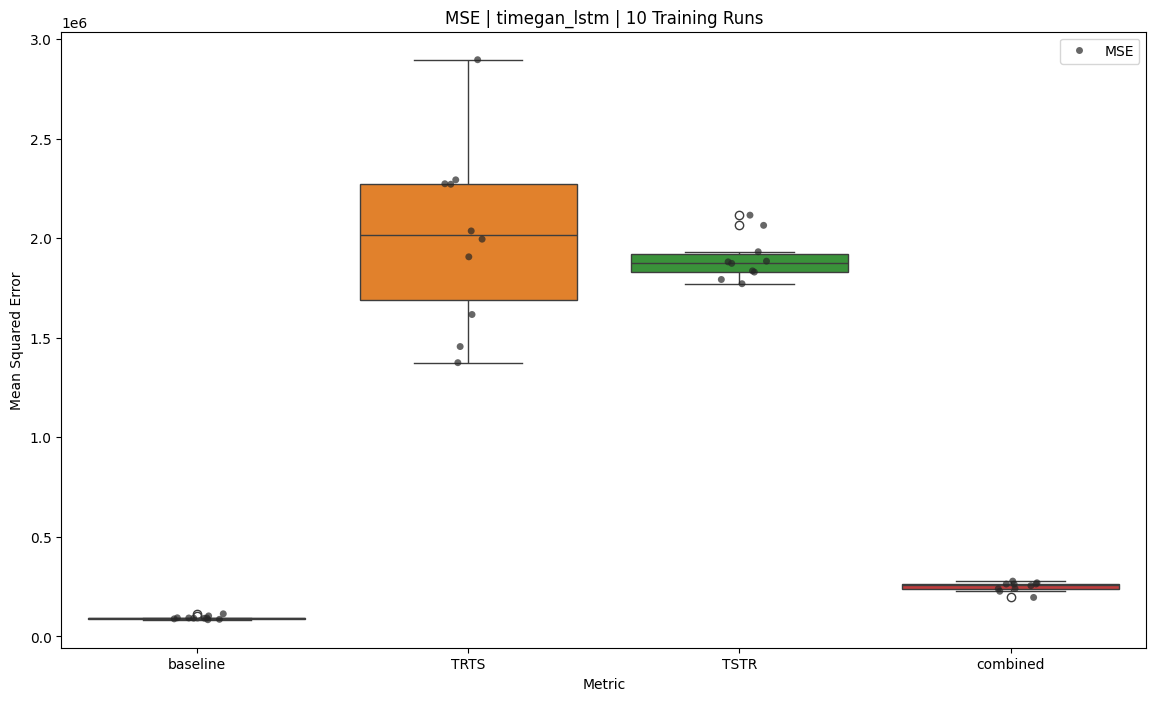

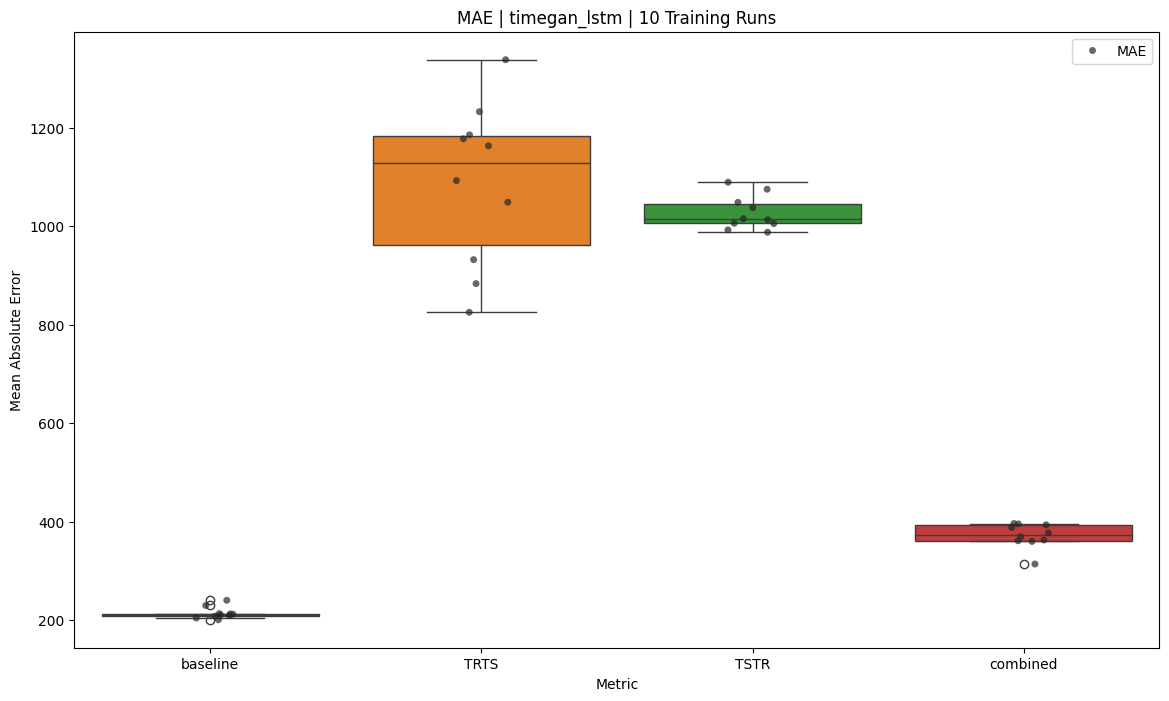

In [16]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Model', y='Error', hue='Model', data=mse_results)
sns.stripplot(x='Model', y='Error', hue='Metric', data=mse_results, dodge=True, jitter=True, palette='dark:black', alpha=0.7)
plt.ylabel('Mean Squared Error')
plt.xlabel('Metric')
plt.title(f'MSE | {syn_data_type} | {hyperparameters["num_evaluation_runs"]} Training Runs')
plt.legend()

plt.figure(figsize=(14, 8))
sns.boxplot(x='Model', y='Error', hue='Model', data=mae_results)
sns.stripplot(x='Model', y='Error', hue='Metric', data=mae_results, dodge=True, jitter=True, palette='dark:black', alpha=0.7)
plt.ylabel('Mean Absolute Error')
plt.xlabel('Metric')
plt.title(f'MAE | {syn_data_type} | {hyperparameters["num_evaluation_runs"]} Training Runs')
plt.legend()

## 3 Visualize Synthetic vs Real Data

In [11]:
# split data before feeding into visual evaluation
data_real_seq = split_data_into_sequences(data_real_numpy, seq_len=hyperparameters['seq_len'], shuffle_data=True)

if data_syn_numpy.ndim == 3:
    data_syn_seq = data_syn_numpy
else:
    data_syn_seq = split_data_into_sequences(data_syn_numpy, seq_len=hyperparameters['seq_len'], shuffle_data=True)

Shape of the data after splitting into sequences: (28500, 12, 11)


Preprocessing data. Shape: (28500, 12, 11)
Data has been preprocessed. Shape: (1000, 132)


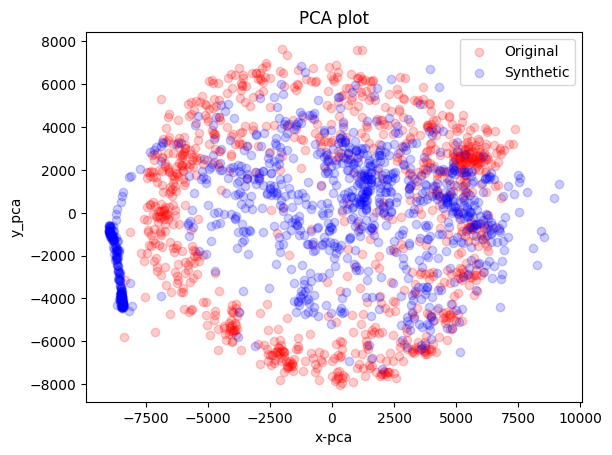

Preprocessing data. Shape: (28500, 12, 11)
Data has been preprocessed. Shape: (1000, 132)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.001s...
[t-SNE] Computed neighbors for 2000 samples in 0.175s...


/Users/arneallwardt/Documents/-Studium/Bachelorarbeit/time_series_data_augmentation/time_series_data_augmentation_venv/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 1147.363823
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.795803
[t-SNE] KL divergence after 300 iterations: 1.061460


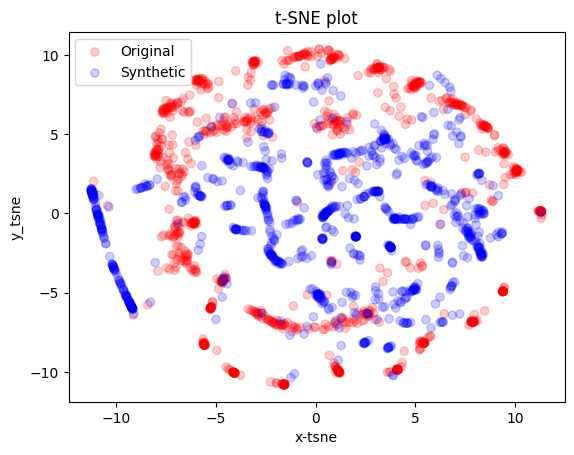

In [12]:
visualize(data_real_seq, data_syn_seq, metric='pca')
visualize(data_real_seq, data_syn_seq, metric='tsne')

### Beispielaussage:
PCA-Analyse von Realen und Synthetischen Daten
Um die Ähnlichkeit zwischen den realen und synthetischen Daten zu bewerten, wurde eine Principal Component Analysis (PCA) durchgeführt. Die PCA reduziert die Dimensionalität der Daten und projiziert sie auf eine zweidimensionale Ebene, wobei die Hauptkomponenten beibehalten werden, die den größten Teil der Varianz erklären.

Abbildung X zeigt den PCA-Plot der realen (rote Punkte) und synthetischen Daten (blaue Punkte). Die folgenden Beobachtungen können gemacht werden:

Verteilung und Clusterbildung:

Die roten Punkte, die die realen Daten repräsentieren, sind in einem spezifischen Bereich konzentriert.
Die blauen Punkte, die die synthetischen Daten darstellen, zeigen eine größere Verteilung und decken einen breiteren Bereich ab.
Ähnlichkeit und Unterschiede:

Die Tatsache, dass die synthetischen Daten eine größere Variabilität aufweisen, könnte darauf hinweisen, dass sie eine breitere Vielfalt an Mustern generieren.
Die Cluster der realen und synthetischen Daten überlappen sich teilweise, was darauf hindeutet, dass die synthetischen Daten einige der Eigenschaften der realen Daten gut nachahmen. Allerdings gibt es auch Bereiche, in denen die synthetischen Daten stark von den realen Daten abweichen, was auf Unterschiede in den zugrunde liegenden Verteilungen hinweist.
Schlussfolgerung:

Die PCA-Analyse zeigt, dass die synthetischen Daten in gewissem Maße die Struktur der realen Daten einfangen, jedoch eine größere Variabilität aufweisen.
Weitere Untersuchungen und Anpassungen am Generierungsprozess der synthetischen Daten könnten notwendig sein, um deren Genauigkeit und Übereinstimmung mit den realen Daten zu verbessern.